In [6]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tools.hh_experiments_loading import load_tsp_results, load_exp, exp_progress_loader, exp_chronics_loader

In [2]:
sns.set(context='talk', font_scale=0.9, rc={'figure.figsize':(20,9)})

In [18]:
#loading the experiments of tree-shaped search space
tree_process, tree_final = load_tsp_results("./dumps/1st benchmark/", exp_progress_loader)
tree_chronics, _ = load_tsp_results("./dumps/1st benchmark/", exp_chronics_loader)

llh_selection = {
    "4.1.1" : "py.ES",
    "4.1.2" : "py.ES",
    "4.1.3" : "py.ES",
    "4.1.4" : "py.ES",
    "4.1.5" : "py.ES",
    "4.2.1" : "py.SA",
    "4.2.2" : "py.SA",
    "4.2.3" : "py.SA",
    "4.2.4" : "py.SA",
    "4.2.5" : "py.SA",
    "4.3.1" : "j.ES",
    "4.3.2" : "j.ES",
    "4.3.3" : "j.ES",
    "4.3.4" : "j.ES",
    "4.3.5" : "j.ES",
    "1.1."  : "Random",
    "1.2."  : "Random",
    "2.1."  : "HH",
    "2.2."  : "FRAMAB",
    "3.1."  : "HH",
    "3.2."  : "BRR",
    "1.3."  : "Random",
    "2.4."  : "FRAMAB-H",
    "2.5."  : "FRAMAB-H",
    "3.4."  : "BRR-H",
    "3.5."  : "BRR-H",
    "5.4."  : "TPE-S",
    "5.5."  : "BRR-S",
    "4.1.6" : "py.ES",
    "4.1.7" : "py.ES",
    "4.2.6" : "py.SA",
    "4.2.7" : "py.SA",
    "4.3.6" : "j.ES",
    "4.3.7" : "j.ES"
}

parameter_selection = {
    "4.1.1" : "Default",
    "4.1.2" : "Tuned",
    "4.1.3" : "Random",
    "4.1.4" : "H-TPE",
    "4.1.5" : "H-BRR",
    "4.2.1" : "Default",
    "4.2.2" : "Tuned",
    "4.2.3" : "Random",
    "4.2.4" : "H-TPE",
    "4.2.5" : "H-BRR",
    "4.3.1" : "Default",
    "4.3.2" : "Tuned",
    "4.3.3" : "Random",
    "4.3.4" : "H-TPE",
    "4.3.5" : "H-BRR",
    "1.1."  : "Default",
    "1.2."  : "Tuned",
    "2.1."  : "HH-FRAMAB", # Default
    "2.2."  : "Tuned",
    "3.1."  : "HH-BRR", # Default
    "3.2."  : "Tuned",
    "1.3."  : "Random",
    "2.4."  : "FRAMAB-H-TPE",
    "2.5."  : "FRAMAB-H-BRR",
    "3.4."  : "BRR-H-TPE",
    "3.5."  : "BRR-H-BRR",
    "5.4."  : "S-TPE",
    "5.5."  : "S-BRR",
    "4.1.6" : "S-TPE",
    "4.1.7" : "S-BRR",
    "4.2.6" : "S-TPE",
    "4.2.7" : "S-BRR",
    "4.3.6" : "S-TPE",
    "4.3.7" : "S-BRR"
}

code_desc_wo_codes = {
    "4.1.1" : "py.ES default",
    "4.1.2" : "py.ES tuned",
    "4.1.3" : "py.ES random",
    "4.1.4" : "py.ES PC-H-TPE",
    "4.1.5" : "py.ES PC-H-BRR",
    "4.2.1" : "py.SA default",
    "4.2.2" : "py.SA tuned",
    "4.2.3" : "py.SA random",
    "4.2.4" : "py.SA PC-H-TPE",
    "4.2.5" : "py.SA PC-H-BRR",
    "4.3.1" : "j.ES default",
    "4.3.2" : "j.ES tuned",
    "4.3.3" : "j.ES random",
    "4.3.4" : "j.ES PC-H-TPE",
    "4.3.5" : "j.ES PC-H-BRR",
    "1.1."  : "random default",
    "1.2."  : "random tuned",
    "2.1."  : "HH-FRAMAB",
    "2.2."  : "FRAMAB tuned",
    "3.1."  : "HH-BRR",
    "3.2."  : "BRR tuned",
    "1.3."  : "random random",
    "2.4."  : "HH-FRAMAB-PC-H-TPE",
    "2.5."  : "HH-FRAMAB-PC-H-BRR",
    "3.4."  : "HH-BRR-PC-H-TPE",
    "3.5."  : "HH-BRR-PC-H-BRR",
    "5.4."  : "HH-S-TPE",
    "5.5."  : "HH-S-BRR",
    "4.1.6" : "py.ES PC-S-TPE",
    "4.1.7" : "py.ES PC-S-BRR",
    "4.2.6" : "py.SA PC-S-TPE",
    "4.2.7" : "py.SA PC-S-BRR",
    "4.3.6" : "j.ES PC-S-TPE",
    "4.3.7" : "j.ES PC-S-BRR"
}
tree_process["ModelType"] = tree_process["Code"].apply(lambda x: code_desc_wo_codes[x])
tree_final["ModelType"] = tree_final["Code"].apply(lambda x: code_desc_wo_codes[x])
tree_chronics["ModelType"] = tree_chronics["Code"].apply(lambda x: code_desc_wo_codes[x])

tree_process.replace(to_replace={"MHjMetalPyES": "py.ES", "MHjMetalPySA": "py.SA", "MHjMetalES": "j.ES"}, inplace=True)
tree_final.replace(to_replace={"MHjMetalPyES": "py.ES", "MHjMetalPySA": "py.SA", "MHjMetalES": "j.ES"}, inplace=True)
tree_chronics.replace(to_replace={"jMetalPy.EvolutionStrategy": "py.ES", "jMetalPy.SimulatedAnnealing": "py.SA", "jMetal.EvolutionStrategy": "j.ES"}, inplace=True)

tree_process["Search space"] = "Tree-shaped"
tree_final["Search space"] = "Tree-shaped"
tree_chronics["Search space"] = "Tree-shaped"

In [75]:
# loading the results of flat search space
exps_flrd = "./dumps/flat_bench/"
flat_chronics = pd.DataFrame()
flat_process = pd.DataFrame()
flat_final = pd.DataFrame()

from core_entities.configuration import Configuration

for e_file_name in os.listdir(exps_flrd):
    expnt = load_exp(exps_flrd + e_file_name)
    ed = expnt.description
    Configuration.set_task_config(expnt.description["TaskConfiguration"])
    
    chronic = exp_chronics_loader(expnt)
    progres = exp_progress_loader(expnt)
    final = progres.iloc[-1]
    
    mode = ed["DomainDescription"]["DataFile"][ed["DomainDescription"]["DataFile"].rfind("/") +1 : ed["DomainDescription"]["DataFile"].rfind("Data")]
    model = ed["ModelConfiguration"]["ModelType"]
    tsp_instance = ed["TaskConfiguration"]["Scenario"]["problem_initialization_parameters"]["instance"]
    tsp_instance = tsp_instance[tsp_instance.rfind("/") + 1:]
    
    # if it is needed to differentiate the repetitions
    if e_file_name.rfind("(") == -1: repetition = 0
    else: repetition = int(e_file_name[e_file_name.rfind("(") + 1:e_file_name.rfind(")")]) + 1

    for ed in [chronic, progres, final]:
        ed["Mode"] = mode
        ed["ModelType"] = mode +  " " + model
        ed["TSP instance"] = tsp_instance
        ed["Repetition"] = repetition
        if mode == "HH":
            ed["Experiment Group"] = "HH-PC"
            if model == "brr":
                ed["Code"] = "5.4."
            if model == "BO":
                ed["Code"] = "5.5."
            continue
        if mode == "pyES": 
            ed["Experiment Group"] = "MH-PC"
            if model == "brr":
                ed["Code"] = "4.1.7"
            if model == "BO":
                ed["Code"] = "4.1.6"
            continue    
        if mode == "pySA":  
            ed["Experiment Group"] = "MH-PC"
            if model == "brr":
                ed["Code"] = "4.2.7"
            if model == "BO":
                ed["Code"] = "4.2.6"
            continue
        if mode == "jES": 
            ed["Experiment Group"] = "MH-PC"
            if model == "brr":
                ed["Code"] = "4.3.7"
            if model == "BO":
                ed["Code"] = "4.3.6"
            continue
    flat_chronics = flat_chronics.append(chronic, sort=False)
    flat_process = flat_process.append(progres, sort=False)
    flat_final = flat_final.append(final, sort=False)

flat_chronics.replace(to_replace={"jMetalPy.EvolutionStrategy": "py.ES", "jMetalPy.SimulatedAnnealing": "py.SA", "jMetal.EvolutionStrategy": "j.ES"}, inplace=True)

flat_chronics["Search space"] = "Flat"
flat_process["Search space"] = "Flat"
flat_final["Search space"] = "Flat"

/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWar

In [26]:
tsp_problems = ["kroA100.tsp", "pr439.tsp", "rat783.tsp", "pla7397.tsp"]
tsp_problems

['kroA100.tsp', 'pr439.tsp', 'rat783.tsp', 'pla7397.tsp']

In [27]:
joined_final = flat_final.append(tree_final, sort=False) # does not modifies old dataframe, but returns updated dataframe
joined_processes = flat_process.append(tree_process, sort=False)

In [28]:
tsp_problems = [
        "kroA100.tsp",
        "pr439.tsp",
        "rat783.tsp",
        "pla7397.tsp",
    ]
instances_optimums = {
        "eil51.tsp":    426,
        "kroA100.tsp":  21282,
        "kroA150.tsp":  26524,
        "kroB200.tsp":  29437,
        "pr439.tsp":    107217,
        "rat783.tsp":   8806,
        "pla7397.tsp":  23260728,
        "d15112.tsp":   1573084
    }

# to see also optimums
instances_boundaries = {
        "kroA100.tsp":  (20000,115282),
        "pr439.tsp":    (97217, 552170),
        "rat783.tsp":   (806, 90000),
        "pla7397.tsp":  (1260728, 3e9),
    }

# to beter see graphs
zoomed_boundaries = {
        "kroA100.tsp":  (20000,45282),
        "pr439.tsp":    (260217, 502170),
        "rat783.tsp":   (22006, 60000),
        "pla7397.tsp":  (0.6e9, 2e9),
    }

In [105]:
for tsp_instance in tsp_problems:
        
    # --- Intermediate results ---
    condition = (joined_processes["TSP instance"] == tsp_instance) & ((joined_processes["Experiment Group"] == "MH") | (joined_processes["Experiment Group"] == "MH-PC")) & (joined_processes["Code"] != "4.1.3") & (joined_processes["Code"] != "4.2.3") & (joined_processes["Code"] != "4.3.3") & (joined_processes["Code"] != "1.1.") & (joined_processes["Code"] != "1.2.") &(joined_processes["Code"] != "1.3.") & (joined_processes["Code"] != "2.2.") & (joined_processes["Code"] != "3.2.")
    blp = joined_processes[condition].copy(deep=True)
    
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
blp

,objective,improvement,iteration,Mode,ModelType,TSP instance,Experiment Group,Code,Search space,Repetition,Optimum,parameters
0,2.821350e+09,0.000000,0,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat,NaN,NaN,S-BRR
1,2.750044e+09,0.036616,1,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat,NaN,NaN,S-BRR
2,2.748684e+09,0.037092,2,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat,NaN,NaN,S-BRR
3,2.744640e+09,0.038509,3,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat,NaN,NaN,S-BRR
4,2.744640e+09,0.038509,4,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat,NaN,NaN,S-BRR
...,...,...,...,...,...,...,...,...,...,...,...,...
285,9.076108e+08,0.002750,285,j.ES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR
286,9.061146e+08,0.003792,286,j.ES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR
287,9.061146e+08,0.003792,287,j.ES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR
288,9.061146e+08,0.003792,288,j.ES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR


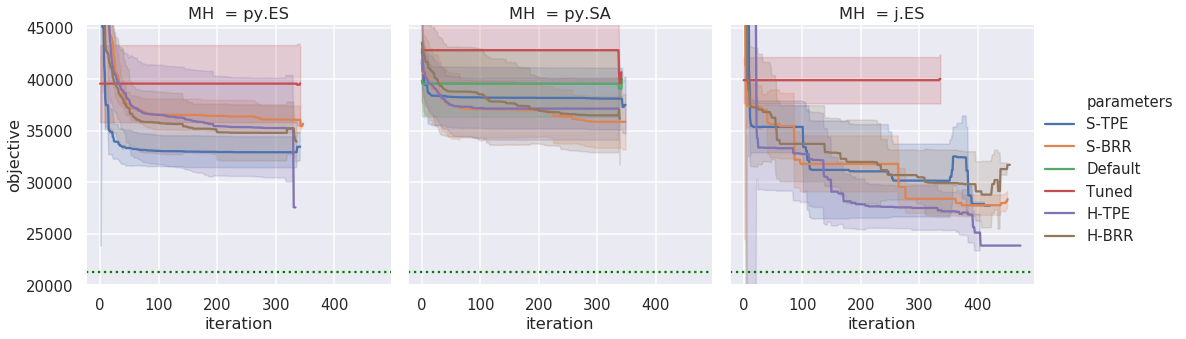

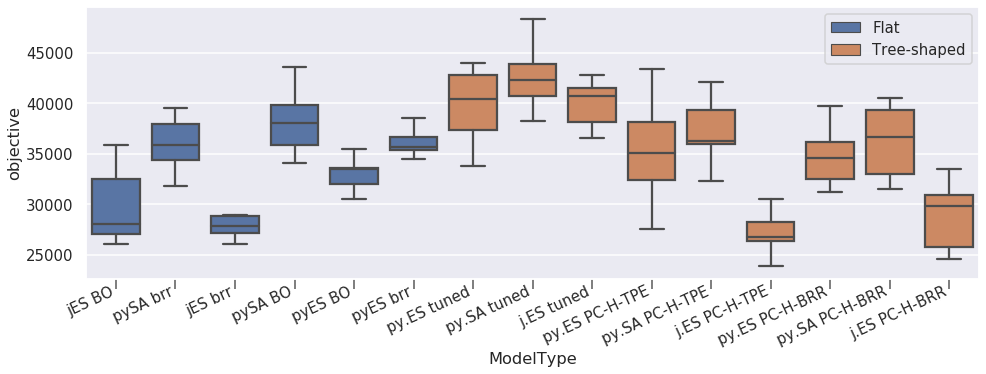

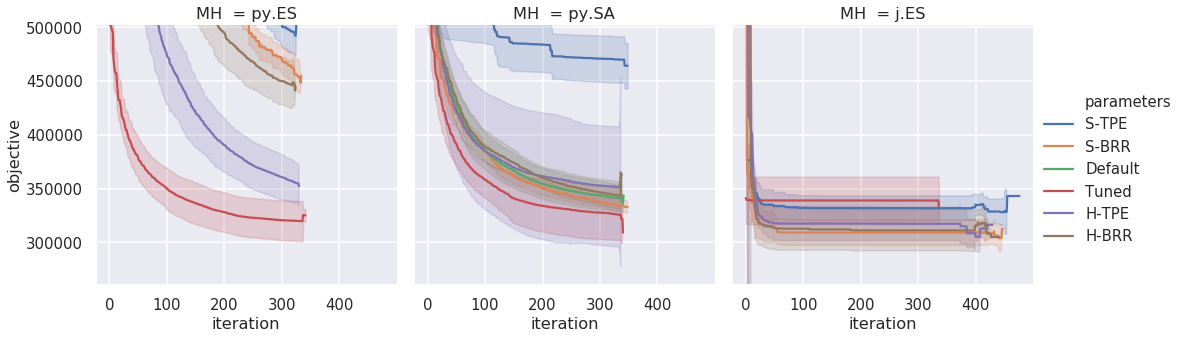

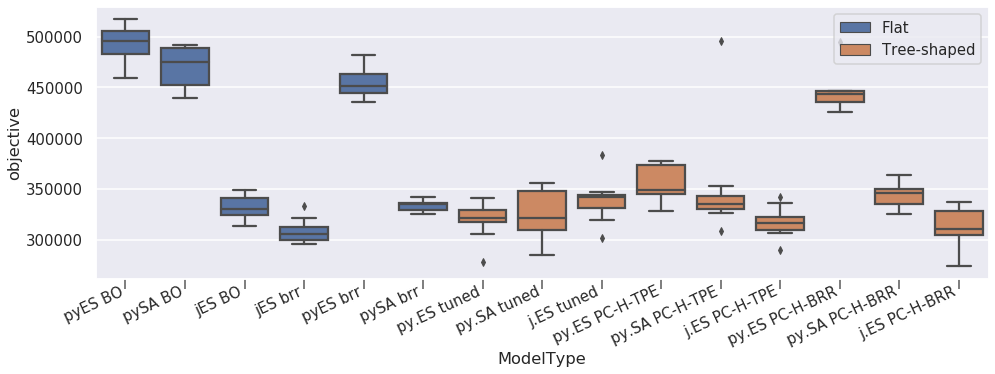

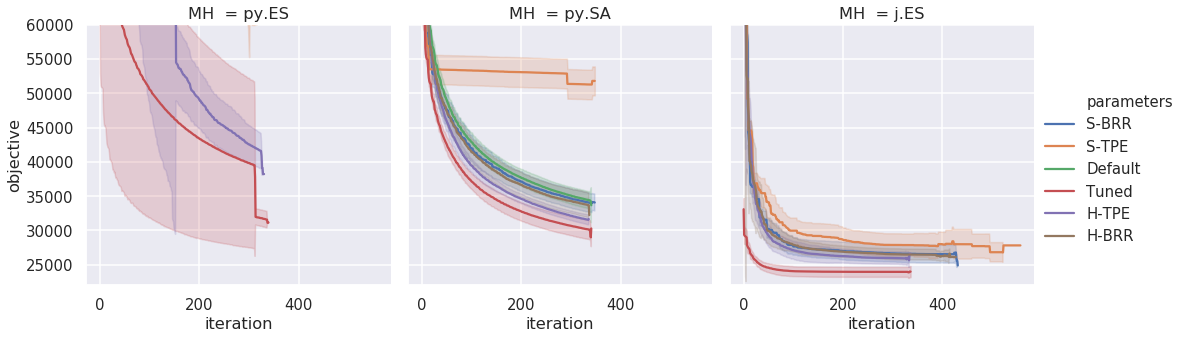

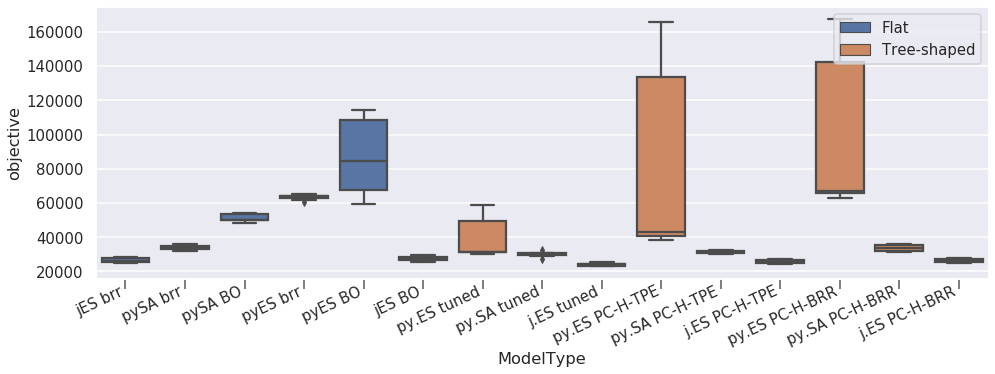

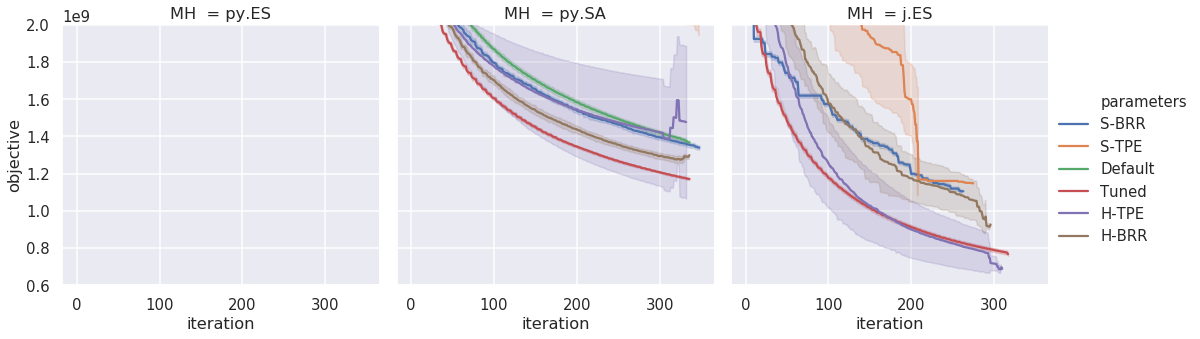

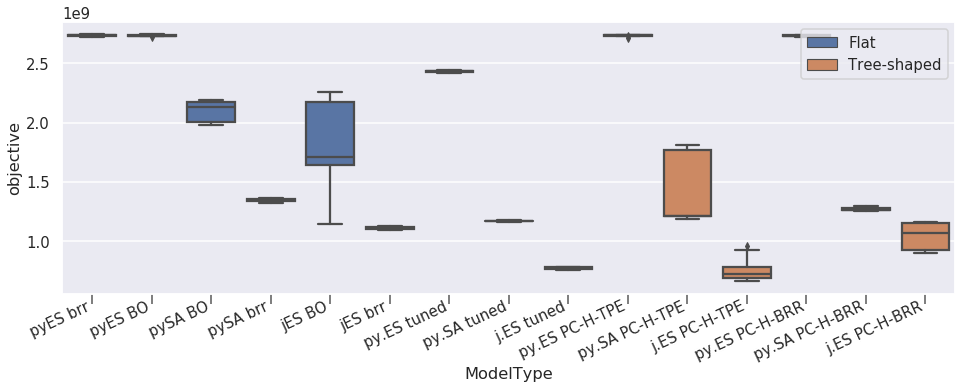

In [106]:
for tsp_instance in tsp_problems:
    # --- Intermediate results ---
    condition = (joined_processes["TSP instance"] == tsp_instance) & ((joined_processes["Experiment Group"] == "MH") | (joined_processes["Experiment Group"] == "MH-PC")) & (joined_processes["Code"] != "4.1.3") & (joined_processes["Code"] != "4.2.3") & (joined_processes["Code"] != "4.3.3") & (joined_processes["Code"] != "1.1.") & (joined_processes["Code"] != "1.2.") &(joined_processes["Code"] != "1.3.") & (joined_processes["Code"] != "2.2.") & (joined_processes["Code"] != "3.2.")
    blp = joined_processes[condition].copy(deep=True)
    blp["MH "] = blp["Code"].apply(lambda x: llh_selection[x])
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
    prog_plot = sns.relplot(x="iteration", y='objective', col="MH ", col_wrap=3, col_order = ["py.ES", "py.SA", "j.ES"],
                            kind="line", ci="sd", hue="parameters", # estimator=None, units="Repetition",
                            #palette=sns.color_palette("deep", all_processes[condition]["Scenario"].unique().shape[0]),
                            data=blp
                           )

    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes]
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    prog_plot.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    #plt.savefig(fname=f"plots/control/{tsp_instance[:-4]} PC progress.svg", dpi=500, bbox_inches='tight')
    plt.show()
    
#for tsp_instance in ["kroA100.tsp"]:
    condition = (joined_final["TSP instance"] == tsp_instance) & (joined_final["Mode"] != "HH") & (joined_final["Code"] != "4.1.3") & (joined_final["Code"] != "4.2.3") & (joined_final["Code"] != "4.3.3") & (joined_final["Code"] != "1.1.") & (joined_final["Code"] != "1.2.") &(joined_final["Code"] != "1.3.") & (joined_final["Code"] != "2.2.") & (joined_final["Code"] != "3.2.")& (joined_final["Code"] != "4.1.1")& (joined_final["Code"] != "4.2.1")& (joined_final["Code"] != "4.3.1")
    blf = joined_final[condition].copy(deep=True)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01}
                            )
    g = sns.boxplot(x="ModelType", y='objective', 
                    hue="Search space",
                    dodge=False, 
                    data=blf,
                    ax=axes
                   )
    #g.axes.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum")
    #g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    axes.legend(loc=1)
    plt.show()

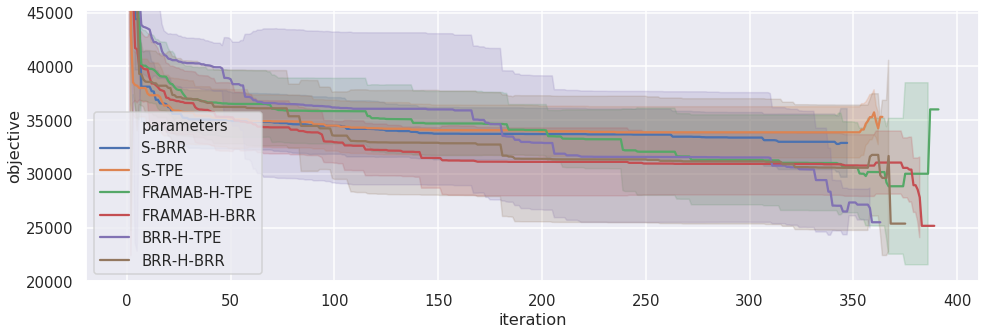

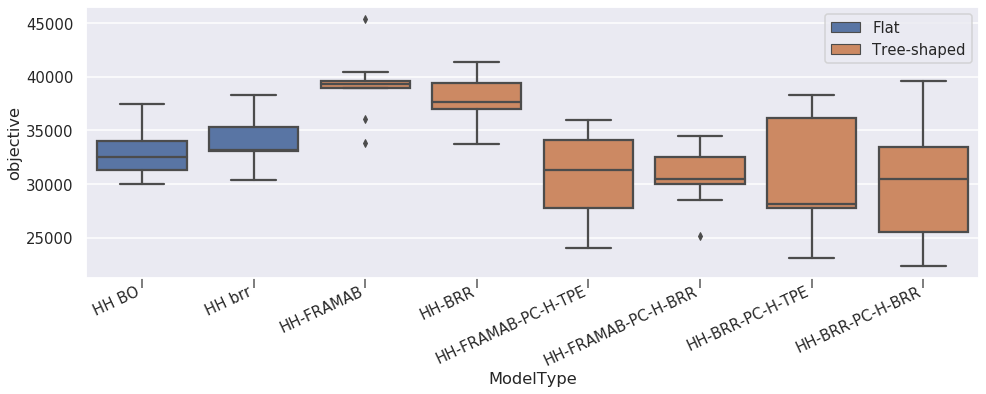

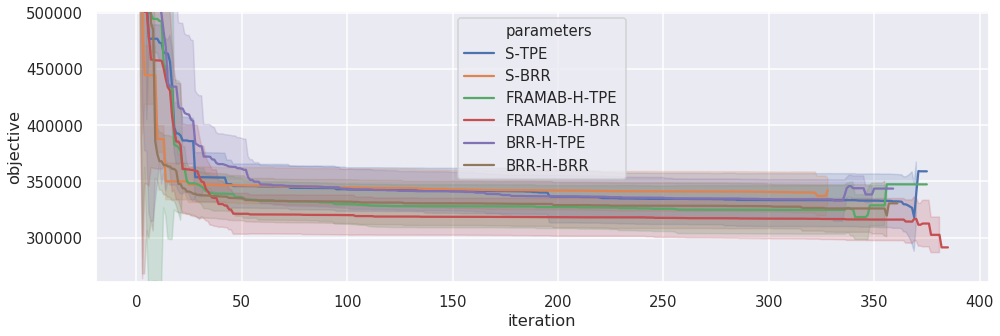

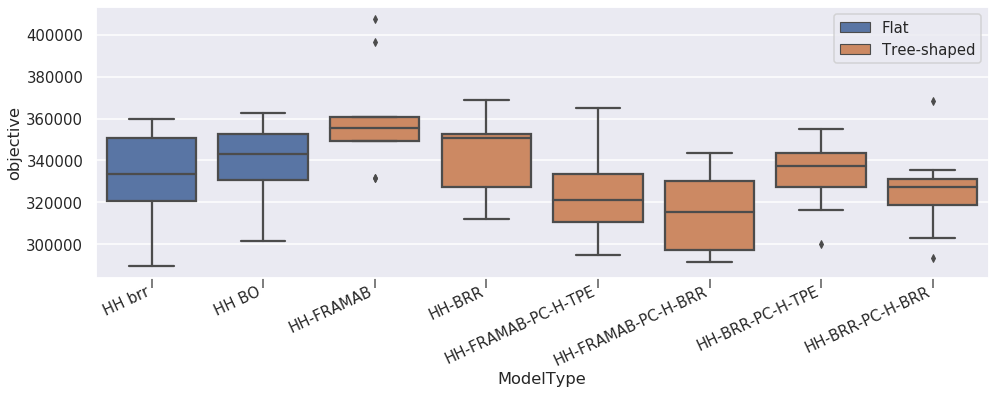

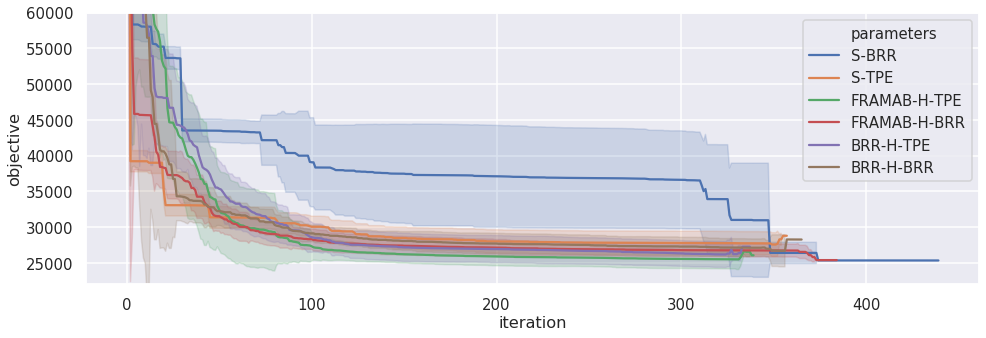

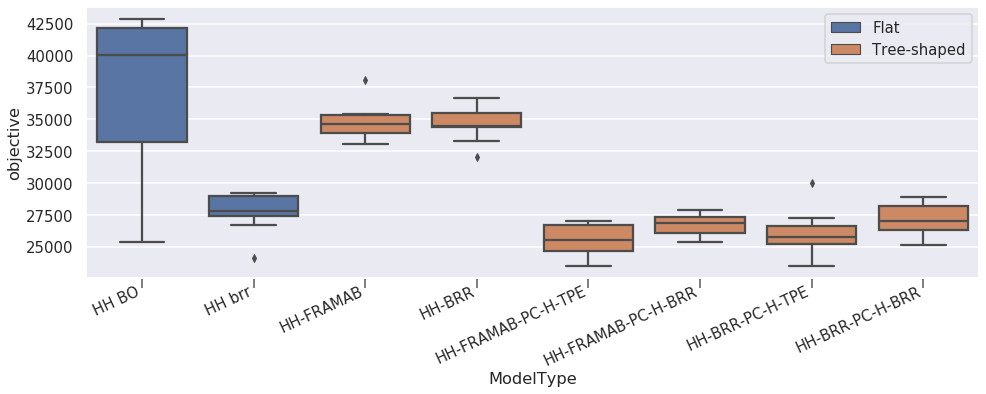

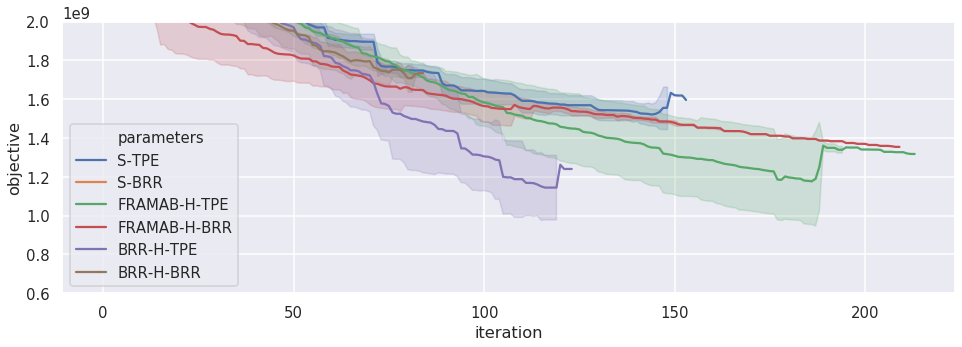

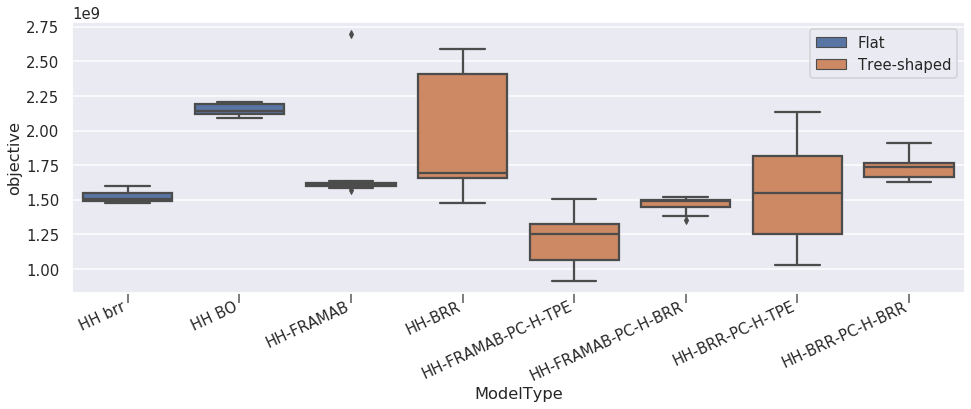

In [107]:
for tsp_instance in tsp_problems:
    # --- Intermediate results ---
    condition = (joined_processes["TSP instance"] == tsp_instance) & (joined_processes["Experiment Group"] == "HH-PC") & (joined_processes["Code"] != "4.1.3") & (joined_processes["Code"] != "4.2.3") & (joined_processes["Code"] != "4.3.3") & (joined_processes["Code"] != "1.1.") & (joined_processes["Code"] != "1.2.") &(joined_processes["Code"] != "1.3.") & (joined_processes["Code"] != "2.2.") & (joined_processes["Code"] != "3.2.")
    blp = joined_processes[condition].copy(deep=True)
    blp["MH "] = "HH"
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                         sharey=True,
                         gridspec_kw={'wspace':0.01}
                        )
    prog_plot = sns.lineplot(x="iteration", y='objective', 
                        ci='sd', hue="parameters", # estimator=None, units="Repetition",
                        data=blp, ax=axes)
#     prog_plot = sns.lineplot(x="iteration", y='objective', col="MH ", col_wrap=1,
#                             kind="line", ci="sd", hue="parameters", # estimator=None, units="Repetition",
#                             #palette=sns.color_palette("deep", all_processes[condition]["Scenario"].unique().shape[0]),
#                             data=blp
#                            )

#     [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes]
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    prog_plot.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    #plt.savefig(fname=f"plots/hh-pc/{tsp_instance[:-4]}_hh-PC_progress.svg", dpi=500, bbox_inches='tight')
    plt.show()
    
#for tsp_instance in ["kroA100.tsp"]:
    condition = (joined_final["TSP instance"] == tsp_instance) & (joined_final["Mode"] == "HH")& (joined_final["Code"] != "4.1.3") & (joined_final["Code"] != "4.2.3") & (joined_final["Code"] != "4.3.3") & (joined_final["Code"] != "1.1.") & (joined_final["Code"] != "1.2.") &(joined_final["Code"] != "1.3.") & (joined_final["Code"] != "2.2.") & (joined_final["Code"] != "3.2.")& (joined_final["Code"] != "4.1.1")& (joined_final["Code"] != "4.2.1")& (joined_final["Code"] != "4.3.1")
    blf = joined_final[condition].copy(deep=True)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01}
                            )
    g = sns.boxplot(x="ModelType", y='objective', 
                    hue="Search space",
                    dodge=False, 
                    data=blf,
                    ax=axes
                   )
    #g.axes.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum")
    #g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    axes.legend(loc=1)
    plt.show()

In [110]:
group_final = pd.DataFrame()
for tsp_instance in tsp_problems:
    group = joined_final[joined_final['TSP instance'] == tsp_instance][["Experiment Group","Code","objective","TSP instance"]]#.groupby(["Experiment Group","Code"])    
    group_final = group_final.append(group, sort=False)

group_final["Approach"] = group_final["Code"].apply(lambda x: code_desc_wo_codes[x])
group_final = group_final.groupby(["Experiment Group","Approach", "TSP instance"])       
r = group_final.agg([pd.np.mean, pd.np.std])

r.to_csv(r'tables/intermediate.csv')


/home/dmitrii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [111]:
# # ['kroA100.tsp', 'pr439.tsp', 'rat783.tsp', 'pla7397.tsp']
# import csv
# with open('tables/final.csv') as writecsv:
#     fieldnames = ["Experiment Group", "Code", "kroA100", "kroA100_mean", "kroA100_std", ]
#     writer = csv.DictWriter(writecsv, fieldnames=fieldnames)

#     with open('tables/intermediate.csv') as csvfile:
#         reader = csv.DictReader(csvfile)
#         for row in reader:
#             if row["Experiment Group"] == "HH-PC":
#                 sth = True
#                 break
# sth

# Intermediate results

In [94]:
joined_chronics = flat_chronics.append(tree_chronics, sort=False)

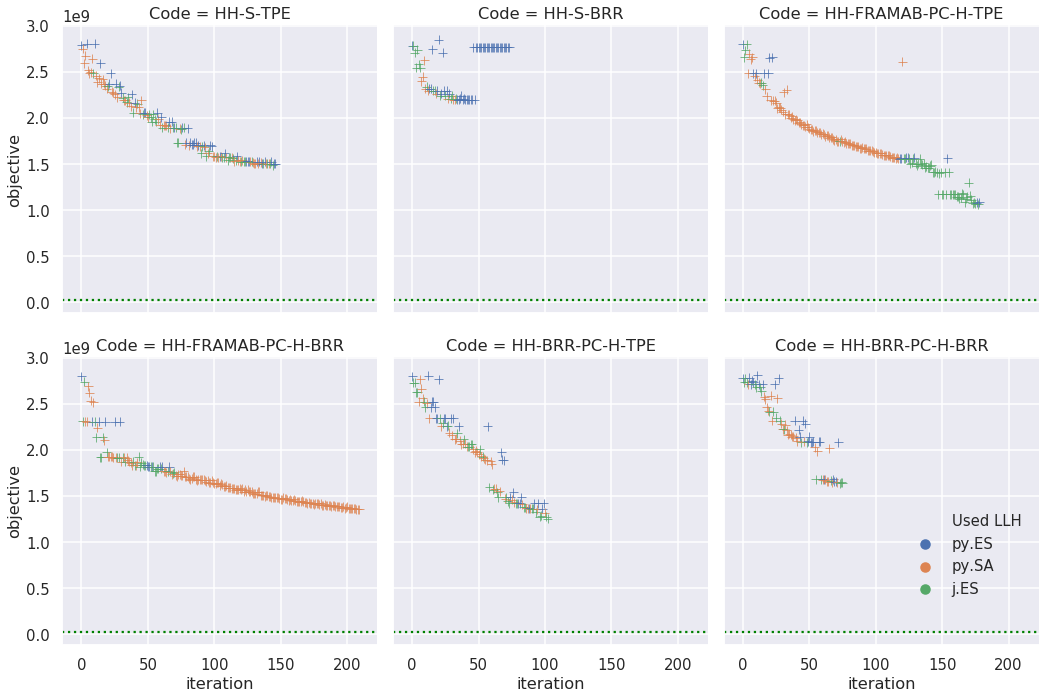

In [109]:
for tsp_instance in tsp_problems[-1:]:
    cond = (joined_chronics["TSP instance"] == tsp_instance) & \
           (joined_chronics["Experiment Group"] == "HH-PC") & \
           (joined_chronics["Repetition"] == 0) & \
           (joined_chronics["Code"] != "1.3.")

    blp = joined_chronics[cond].copy(deep=True)

    blp.rename(columns={"low level heuristic": "Used LLH"}, inplace=True)
    blp["Code"] = blp["Code"].apply(lambda x: code_desc_wo_codes[x])
    prog_plot = sns.relplot(x="iteration", y='objective', col="Code", col_wrap=3, marker="+", ci='sd', 
                            hue="Used LLH", hue_order=["py.ES", "py.SA", "j.ES"],
                            data=blp#, 
                            #height=3.5, aspect=1.4, #facet_kws={'margin_titles':True},
                           )
    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes.flatten()]
    prog_plot.fig.subplots_adjust(wspace=.05, hspace=.15)
    #prog_plot.set(font_scale=2)
    leg = prog_plot._legend
    leg.set_bbox_to_anchor([0.86, 0.2]) 
    #leg._ncol = 5
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    #prog_plot.set(ylim=(instances_boundaries[tsp_instance][0], instances_boundaries[tsp_instance][1]))
    #plt.savefig(fname=f"plots/hh-pc/{tsp_instance[:-4]}_HH-PC_progress.svg", dpi=500, bbox_inches='tight')
    plt.show()